In [5]:
from picamera import PiCamera
from time import sleep
from sense_hat import SenseHat



## Teachable Machne models

* MobileNet for images: * https://github.com/googlecreativelab/teachablemachine-community/tree/master/libraries

## Test setup - Display message

In [2]:

sense = SenseHat()
sense.set_rotation(270)

OSError: Cannot detect RPi-Sense FB device

In [3]:
sense.show_message("Astro Pi")

In [4]:
humid = sense.get_humidity()
humid

23.790178298950195

## Camera

In [2]:
camera = PiCamera()
#camera.resolution = (2592, 1944)
camera.resolution = (1024, 1024)

camera.capture(f'image_{1:03d}.jpg')  # Take a picture every minute for 3 hours


Check https://developpaper.com/building-deep-learning-application-with-raspberry-pie-4b-6-tensorflow-lite/

In [6]:
import matplotlib.pyplot as plt
from picamera.array import PiRGBArray
from picamera import PiCamera
import time
import ipywidgets.widgets as widgets
import traitlets
#import cv2

In [7]:
camera = PiCamera()
camera.resolution = (1024, 1024)

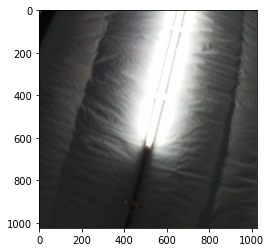

In [8]:
# initialize the camera and grab a reference to the raw camera capture

rawCapture = PiRGBArray(camera)
# allow the camera to warmup
time.sleep(0.1)
# grab an image from the camera
camera.capture(rawCapture, format="bgr")
image_cam = rawCapture.array
#rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#plt.imshow(rgb_img)
plt.imshow(image_cam)



In [16]:
#image = widgets.Image(format='jpeg', width=500, height=500)
#camera_link = traitlets.dlink((camera, 'value'), (image, 'value'), transform=jetbot.bgr8_to_jpeg)
#camera_link = traitlets.dlink((image_cam, 'value'), (image, 'value'))

#display(image)

In [5]:
image_cam.shape


(1024, 1024, 3)

In [6]:
from skimage.transform import resize
size = (224, 224)
image_array = resize(image_cam, size, anti_aliasing=True)

In [7]:
image_array.shape

(224, 224, 3)

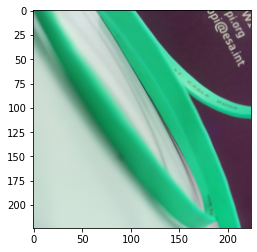

In [8]:
plt.imshow(image_array)

# Classification from camera

In [9]:
from keras.models import load_model


In [10]:
model = load_model('./keras_model.h5')

In [12]:
import numpy as np
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

2021-11-30 13:42:56.141745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-30 13:42:56.155603: W tensorflow/core/platform/profile_utils/cpu_utils.cc:116] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


[[0.57541543 0.4245845 ]]


## Loop

In [13]:
camera.resolution = (224, 224)
rawCapture = PiRGBArray(camera)
# allow the camera to warmup
time.sleep(0.1)
size = (224, 224)
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

In [14]:
for i in range(10):
    # grab an image from the camera
    start_time=time.time()
    rawCapture = PiRGBArray(camera)
    camera.capture(rawCapture, format="bgr")
    image_cam = rawCapture.array
    print(image_cam.shape)
    print('Time to take picture: '+str(time.time()-start_time))
    
    start_time=time.time()
    #plt.imshow(image_cam)
    image_array = resize(image_cam, size, anti_aliasing=False)
    print(image_cam.shape)
    
    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    # Load the image into the array
    data[0] = normalized_image_array
    print('Time to format picture: '+str(time.time()-start_time))

    # run the inference
    start_time=time.time()
    prediction = model.predict(data)
    print('Time to predict: '+str(time.time()-start_time))
    print(prediction)

(224, 224, 3)
Time to take picture: 0.4371795654296875
(224, 224, 3)
Time to format picture: 0.04364013671875
Time to predict: 0.3147294521331787
[[0.57566947 0.4243306 ]]
(224, 224, 3)
Time to take picture: 0.4700813293457031
(224, 224, 3)
Time to format picture: 0.043940067291259766
Time to predict: 0.3201911449432373
[[0.57575256 0.4242474 ]]
(224, 224, 3)
Time to take picture: 0.45345616340637207
(224, 224, 3)
Time to format picture: 0.12629437446594238
Time to predict: 0.6031961441040039
[[0.57579505 0.42420492]]
(224, 224, 3)
Time to take picture: 0.442427396774292
(224, 224, 3)
Time to format picture: 0.06331086158752441
Time to predict: 0.5492408275604248
[[0.5758068  0.42419317]]
(224, 224, 3)
Time to take picture: 0.43364882469177246
(224, 224, 3)
Time to format picture: 0.04257488250732422


KeyboardInterrupt: 

# Classification from file

In [10]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np


In [12]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_3 (Sequential)    (None, 2)                 128300    
Total params: 538,508
Trainable params: 524,428
Non-trainable params: 14,080
_________________________________________________________________
None


In [13]:
#model.layers[0].summary()
#model.layers[0].layers[0].summary()
model.layers[1].summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_Dense1 (Dense)         (None, 100)               128100    
_________________________________________________________________
dense_Dense2 (Dense)         (None, 2)                 200       
Total params: 128,300
Trainable params: 128,300
Non-trainable params: 0
_________________________________________________________________


In [52]:
image = Image.open('./hand.png')

In [56]:
np.asarray(image).shape

(224, 224, 4)

In [27]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('./hand.png')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
image_array=image_array[:,:,0:3]

In [29]:
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[2.2668823e-06 9.9999774e-01]]


In [31]:
%time prediction = model.predict(data)

CPU times: user 282 ms, sys: 97.7 ms, total: 380 ms
Wall time: 274 ms


## Motor

In [9]:
from gpiozero import Robot
robby = Robot(left=(7,8), right=(9,10))


In [10]:
import time
from adafruit_motorkit import MotorKit



In [17]:
import adafruit_motorkit

In [18]:
kit = MotorKit()


In [19]:

kit.motor1.throttle = 1
time.sleep(1)

kit.motor1.throttle = 0

In [20]:
kit.motor2.throttle = 0.5
kit.motor1.throttle = 0.5
time.sleep(1)

kit.motor2.throttle = 0
kit.motor1.throttle = 0

In [21]:
for i in range(1):
    kit.stepper1.onestep()

## Test WebSocket

In [1]:
from cloudlink import CloudLink
import time


In [2]:
def on_new_packet(message): # message value is automatically converted into a dictionary datatype
    print(message)

def on_message(message): # message value is automatically converted into a dictionary datatype
    print(message)

def on_connect(): # use to start other scripts, in this example we declare a username: "test"
    cl.sendPacket({"cmd": "setid", "val": "test"})

def on_error(error): # does this do something?
    print(error)

cl = CloudLink() # Instanciate the module


CloudLink v0.1.5.2


In [3]:
cl.client("ws://127.0.0.1:3000/",
        on_new_packet = on_new_packet,
        on_connect = on_connect,
        on_error = on_error,
         ) 

{'cmd': 'ulist', 'val': ''}
{'cmd': 'gmsg', 'val': ''}
{'cmd': 'direct', 'val': {'cmd': 'vers', 'val': '0.1.6'}}
{'cmd': 'direct', 'val': {'cmd': 'motd', 'val': 'Hello, World!'}}
{'cmd': 'ulist', 'val': 'test;'}
{'cmd': 'gmsg', 'val': 'Apple'}
{'cmd': 'gmsg', 'val': 'Apple'}
